In [1]:
#import dependencies
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
#read the merged crime and weather data from saved files   
merged_table = pd.read_csv('./Resources/merged_crime_and_weather_data.csv')

In [3]:
# get a count so we can ensure we have all our data
merged_table.count()

date            801551
primary_type    801551
temp            801551
date_trunc      801551
year            801551
dtype: int64

In [4]:
#preview the data
merged_table.head()

,date,primary_type,temp,date_trunc,year
0,2015-12-31 23:00:00,THEFT,24.0,2015-12-31 00:00:00,2015.0
1,2015-12-31 23:00:00,CRIMINAL DAMAGE,24.0,2015-12-31 00:00:00,2015.0
2,2015-12-31 23:00:00,BATTERY,24.0,2015-12-31 00:00:00,2015.0
3,2015-12-31 23:00:00,THEFT,24.0,2015-12-31 00:00:00,2015.0
4,2015-12-31 23:00:00,BATTERY,24.0,2015-12-31 00:00:00,2015.0


In [5]:
#reduce the data to just the temperatures for chicago crime from 2015-2017
temperatures = merged_table['temp']

In [6]:
# Get the measures of central tendency
mean_crime = np.mean(temperatures)
print(f"The mean temperature of crime in Chicago is {mean_crime}")

median_crime= np.median(temperatures)
print(f"The median temperature of crime in Chicago is {median_crime}")

mode_crime = sts.mode(temperatures)
print(f"The mode temperature of crime in Chicago is {mode_crime}")

The mean temperature of crime in Chicago is 55.07380815444058
The median temperature of crime in Chicago is 57.0
The mode temperature of crime in Chicago is ModeResult(mode=array([73.]), count=array([18923]))


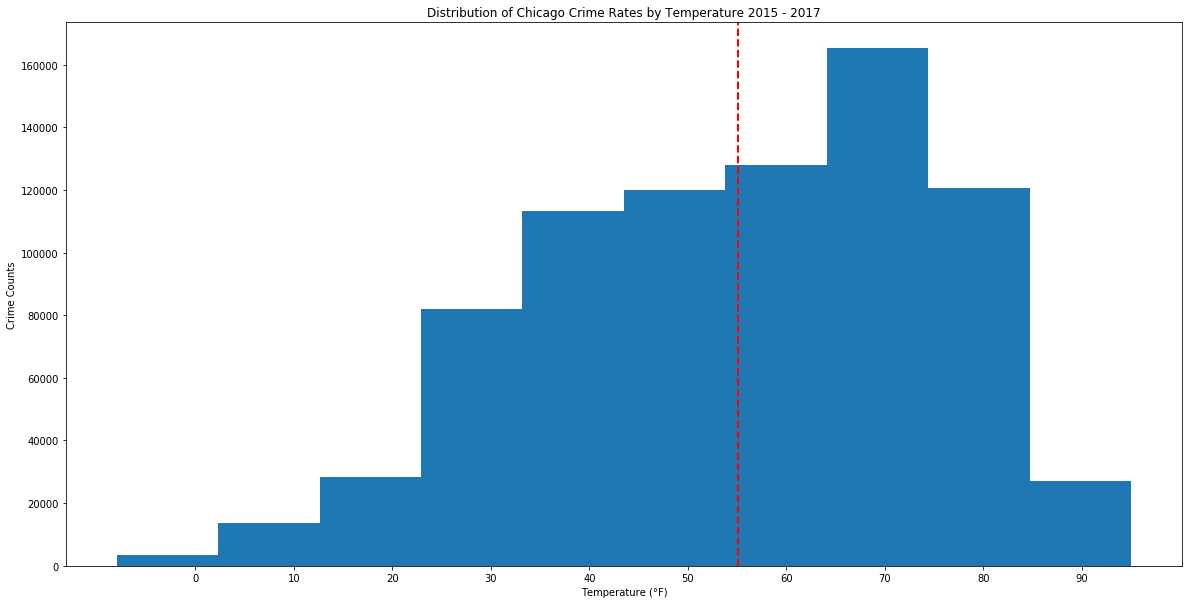

Sample looks Gaussian/normal (fail to reject NULL hypothesis p-value = 0.05828195196453393


In [7]:
# Display the distribution of the crime temperatures
# source - UCF Bootcamp stats training :)
# and to help me understand the result of normaltest
# https://datascienceplus.com/normality-tests-in-python/
# draw an average line in histogram
#https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib

#adjust the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#histogram, labels and mean line
plt.hist(temperatures)
plt.title("Distribution of Chicago Crime Rates by Temperature 2015 - 2017")
plt.xlabel('Temperature (°F)')
plt.ylabel('Crime Counts')
plt.axvline(temperatures.mean(), color='r', linestyle='dashed', linewidth=2)

x_axis = np.arange(0,100,10)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

# save then show
plt.savefig("./Images/distribution_crime_by_temp.png")
plt.show()

# normality test
# provide the p-value
stat, p = sts.normaltest(temperatures.sample(100))

# interpret
alpha = 0.05
if p > alpha:
    print(f'Sample looks Gaussian/normal (fail to reject NULL hypothesis p-value = {p}')
else:
    print(f'Sample does not look Gaussian/normal (reject NULL hypothesis p-value = {p}')

In [8]:
# Calculate the variance and standard deviation of the data
variance = np.var(temperatures,ddof = 0)
print(f"The population variance using the NumPy module is {variance}")

std = np.std(temperatures,ddof = 0)
print(f"The population standard deviation using the NumPy module is {std}")

The population variance using the NumPy module is 390.8225682903794
The population standard deviation using the NumPy module is 19.76923287055872


In [9]:
temperatures.min()

-8.0

In [10]:
temperatures.max()

95.0

In [11]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_crime-std,3)} and {round(mean_crime+std,3)}")
print(f"Roughly 95% of the data is between {round(mean_crime-2*std,3)} and {round(mean_crime+2*std,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_crime-3*std,3)} and {round(mean_crime+3*std,3)}")

Roughly 68% of the data is between 35.305 and 74.843
Roughly 95% of the data is between 15.535 and 94.612
Roughly 99.7% of the data is between -4.234 and 114.382
